In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer, PolynomialFeatures
from sklearn.metrics import mean_squared_error, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from pyearth import Earth
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Carrega dados e separa as amoastras
link = 'https://raw.githubusercontent.com/jacobwright32/Web_Scraper_AI_Core_Project/bb4865ae568e23ab8fadb6ea58cf117df2164ef3/web%20scraping/Cleaned%20Data/Brazil_Sao%20Bernardo%20Do%20Campo_Cleaned.csv'
dados = pd.read_csv(link).select_dtypes(['number'])

y = dados['maximum_temprature']
X = dados.loc[:, dados.columns != 'maximum_temprature']

a) **Criação de pipelines** Usando pipelines, crie três diferentes pré processamentos para as features numéricas da base: a) uma sem transformações, b) outra fazendo estandardiazação das variáveis e c) outra incluindo alguns polinômios. As pipelines devem usar regressão linear simples como modelo para predizer a variável maximum_temprature.

In [3]:
def get_rmse_reg():
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

    reg = LinearRegression().fit(X_train, Y_train)

    return mean_squared_error(Y_test, reg.predict(X_test))

get_rmse_reg()

2.796555951125067

In [4]:
def get_rmse_scale_reg():
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

    # Cria uma pipeline
    pipe = Pipeline([
        ('scale', StandardScaler()),
        ('lm', LinearRegression())
        ])

    # Treina o modelo, calcula o RMSE
    pipe.fit(X_train, Y_train)
    
    return mean_squared_error(Y_test, pipe.predict(X_test))
    
get_rmse_scale_reg()

2.9689169546519767

In [5]:
def get_rmse_scale_poly_reg():
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

    # Cria uma pipeline
    pipe = Pipeline([
        ('scale', StandardScaler()),
        ('poly', PolynomialFeatures(2)),
        ('lm', LinearRegression())
        ])

    # Treina o modelo, calcula o RMSE
    pipe.fit(X_train, Y_train)
    
    return mean_squared_error(Y_test, pipe.predict(X_test))

get_rmse_scale_poly_reg()

2.9184384025105534

b) **Benchmark** Compare as pipelines anteriores rodando 100 vezes cada uma usando holdout com 70% das observações em treino, calculando para cada também o RMSE. Reporte os resultados por meio de um gráfico de boxplot. Dica: use uma função para encapsular pipelines, treino dos modelos e cálculo de métricas de validação.

In [6]:
rmse_reg = [get_rmse_reg() for i in range(100)]
rmse_scale_reg = [get_rmse_scale_reg() for i in range(100)]
rmse_scale_poly_reg = [get_rmse_scale_poly_reg() for i in range(100)]

<AxesSubplot:xlabel='variable', ylabel='rmse'>

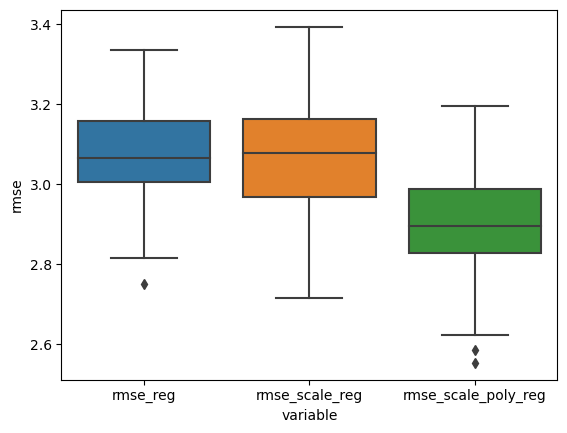

In [7]:
rmse = pd.DataFrame({
    'rmse_reg': rmse_reg,
    'rmse_scale_reg': rmse_scale_reg,
    'rmse_scale_poly_reg': rmse_scale_poly_reg
})

rmse = pd.melt(rmse, value_name='rmse', value_vars=['rmse_reg', 'rmse_scale_reg', 'rmse_scale_poly_reg'])

sns.boxplot(data=rmse, x='variable', y='rmse')

c) **Comparação dos modelos** Selecione a melhor pipeline do exercício anterior e crie outras três novas em cima dela: uma que regressão por KNN em vez de regressão linear, uma que use MARS (o algoritmo earth); e, por fim, uma que use regressão por meio de árvore de decisão (tree ou regr.rpart). Rode 100 vezes cada pipeline e compare novamente od RMSE usando um gráfico boxplot.

In [41]:
def get_rmse_scale_poly_knn(X, y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

    # Cria uma pipeline
    pipe = Pipeline([
        ('scale', StandardScaler()),
        ('poly', PolynomialFeatures(2)),
        ('knn', KNeighborsClassifier())
        ])

    # Treina o modelo, calcula o RMSE
    pipe.fit(X_train, Y_train)
    
    return mean_squared_error(Y_test, pipe.predict(X_test))

def get_rmse_pred_scale_poly_mars(X, y, return_rmse=True):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

    # Cria uma pipeline
    pipe = Pipeline([
        ('scale', StandardScaler()),
        ('poly', PolynomialFeatures(2)),
        ('mars', Earth())
        ])

    # Treina o modelo, calcula o RMSE
    pipe.fit(X_train, Y_train)
    
    return mean_squared_error(Y_test, pipe.predict(X_test)) if return_rmse else pipe.predict(X_test), Y_test

def get_rmse_scale_poly_tree(X, y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

    # Cria uma pipeline
    pipe = Pipeline([
        ('scale', StandardScaler()),
        ('poly', PolynomialFeatures(2)),
        ('tree', tree.DecisionTreeClassifier())
        ])

    # Treina o modelo, calcula o RMSE
    pipe.fit(X_train, Y_train)
    
    return mean_squared_error(Y_test, pipe.predict(X_test))

In [9]:
rmse_scale_poly_knn = [get_rmse_scale_poly_knn(X=X, y=y) for i in range(100)]
rmse_scale_poly_mars = [get_rmse_pred_scale_poly_mars(X=X, y=y) for i in range(100)]
rmse_scale_poly_tree = [get_rmse_scale_poly_tree(X=X, y=y) for i in range(100)]

<AxesSubplot:xlabel='variable', ylabel='rmse'>

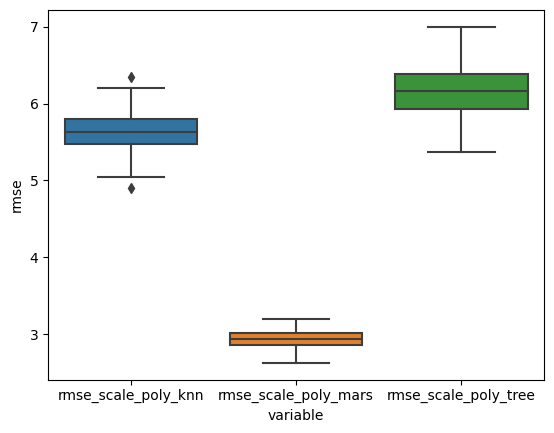

In [10]:
rmse = pd.DataFrame({
    'rmse_scale_poly_knn': rmse_scale_poly_knn,
    'rmse_scale_poly_mars': rmse_scale_poly_mars,
    'rmse_scale_poly_tree': rmse_scale_poly_tree
})

rmse = pd.melt(rmse, value_name='rmse', value_vars=['rmse_scale_poly_knn', 'rmse_scale_poly_mars', 'rmse_scale_poly_tree'])

sns.boxplot(data=rmse, x='variable', y='rmse')

d) **Validação** Usando a melhor *pipeline* encontrada no exercício anterior, faça validação nas seguintes bases de dados:

In [20]:
# Clima em Campinas
campinas = 'https://raw.githubusercontent.com/jacobwright32/Web_Scraper_AI_Core_Project/bb4865ae568e23ab8fadb6ea58cf117df2164ef3/web%20scraping/Cleaned%20Data/Brazil_Sao%20Bernardo%20Do%20Campo_Cleaned.csv'
campinas = pd.read_csv(campinas)
campinas = campinas.select_dtypes(['number'])
y_camp = campinas['maximum_temprature']
X_camp = campinas.loc[:, dados.columns != 'maximum_temprature']

# Clima em Southampton
southampton = 'https://raw.githubusercontent.com/jacobwright32/Web_Scraper_AI_Core_Project/master/web%20scraping/Cleaned%20Data/United%20Kingdom_Southampton_Cleaned.csv'
southampton = pd.read_csv(southampton)
southampton = southampton.select_dtypes(['number'])
y_sh = southampton['maximum_temprature']
X_sh = southampton.loc[:, southampton.columns != 'maximum_temprature']

In [22]:
rmse_scale_poly_mars_campinas = [get_rmse_pred_scale_poly_mars(X=X_camp, y=y_camp) for i in range(100)]
rmse_scale_poly_mars_southampton = [get_rmse_pred_scale_poly_mars(X=X_sh, y=y_sh) for i in range(100)]

<AxesSubplot:ylabel='Count'>

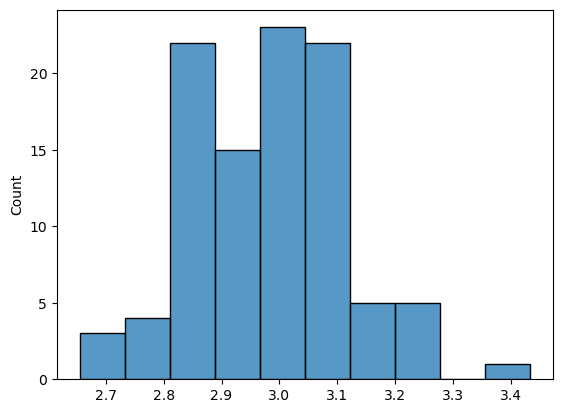

In [23]:
sns.histplot(rmse_scale_poly_mars_campinas)

<AxesSubplot:ylabel='Count'>

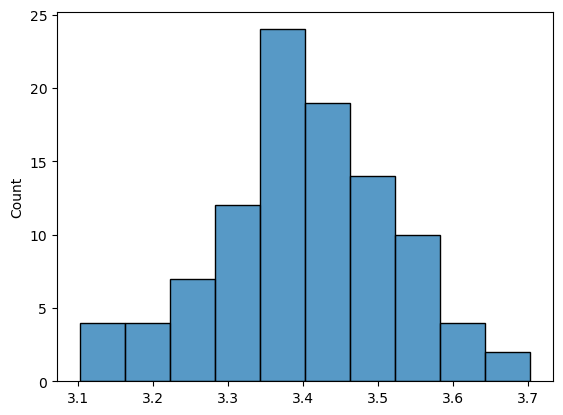

In [24]:
sns.histplot(rmse_scale_poly_mars_southampton)

e) **Visualização** Usando os resultados da melhor *pipeline*, plote a relação entre predições e valores reais de `maximum_temprature` nas duas bases de validação.

<AxesSubplot:ylabel='maximum_temprature'>

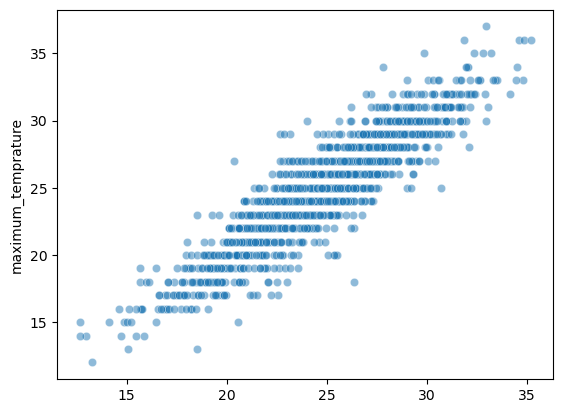

In [52]:
y_pred_test_camp = get_rmse_pred_scale_poly_mars(X=X_camp, y=y_camp, return_rmse=False)
sns.scatterplot(y_pred_test_camp[0], y_pred_test_camp[1], alpha=0.5)

<AxesSubplot:ylabel='maximum_temprature'>

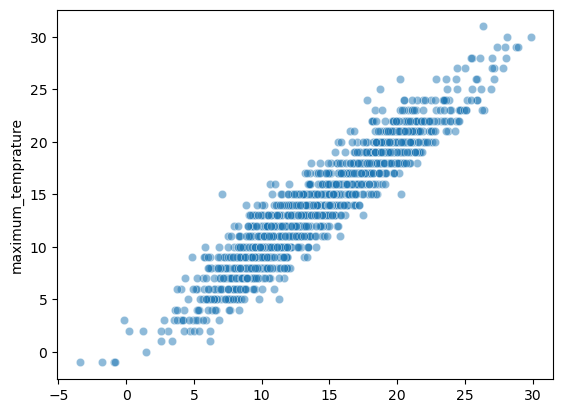

In [51]:
y_pred_test_sh = get_rmse_pred_scale_poly_mars(X=X_sh, y=y_sh, return_rmse=False)
sns.scatterplot(y_pred_test_sh[0], y_pred_test_sh[1], alpha=0.5)

**2) Árvores de decisão e *bag-of-words***

Como vimos, pré-processamento deve ser aplicado *antes* de fazermos *split sample* de validação (i.e., criar amostras de teste e de treino). Agora, implemente um *workflow* que leva isso em conta. Para tanto, você deverá criar uma função que separe textos em treino e teste, que aplique pré-processamento apenas na amostra de treino e que, depois, replique ele na amostra de teste para, então, rodar um algoritmo e calcular alguma métrica de validação.


Para esse exercício, será necessário carregar uma base de discursos presidenciais feitos por Dilma Rousseff e Michel Temer em parte de seus mandatos:

In [12]:
link = 'https://github.com/FLS-6497/datasets/raw/main/aula5/discursos_presidenciais.csv'
discursos = pd.read_csv(link, sep=';')

Também precisaremos fazer pré-processamento dos textos:

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
# vct = CountVectorizer() # Ha mais hyperparametros
# X = vct.fit_transform(discursos.discurso)

**a) *Pipelines***

Usando *pipelines*, crie duas *pipelines* diferentes de pré-processamentos para as os discursos da base: a) uma que só mantenha termos que aparecem em pelo menos 20% dos documentos (ou ao menos em 20 documentos); outra igual a anterior que permita bi-gramas. As *pipelines* devem usar *Naive Bayes* como modelo para predizer a variável `planalto`.


In [106]:
def get_f1_gnb_20():
    X = discursos.discurso
    y = discursos.planalto

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    vectorizer = CountVectorizer(
        stop_words=stopwords.words('portuguese'),
        token_pattern=r"(?u)\b\w\w\w+\b",
        analyzer='word', 
        ngram_range=(1, 1), 
        min_df=0.2
        )

    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)

    X_train = X_train.toarray()
    X_test = X_test.toarray()

    gnb = GaussianNB()

    y_pred = gnb.fit(X_train, y_train).predict(X_test)

    f1 = f1_score(y_test, y_pred, average='macro')

    return f1

def get_f1_gnb_bigrams_20():
    X = discursos.discurso
    y = discursos.planalto

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    vectorizer = CountVectorizer(
        stop_words=stopwords.words('portuguese'),
        token_pattern=r"(?u)\b\w\w\w+\b",
        analyzer='word', 
        ngram_range=(1, 2), 
        min_df=0.2
        )

    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)

    X_train = X_train.toarray()
    X_test = X_test.toarray()

    gnb = GaussianNB()

    y_pred = gnb.fit(X_train, y_train).predict(X_test)

    f1 = f1_score(y_test, y_pred, average='macro')

    return f1

**b) Benchmark**

Rode cada *pipeline* 10 vezes, calculando o `F1` de cada predição do modelo na base de teste que tenha 20% dos discursos. Plote os resultados usando boxplot.

<AxesSubplot:xlabel='variable', ylabel='f1_results'>

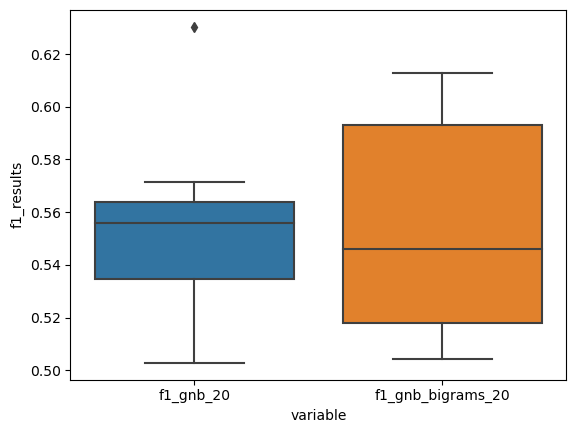

In [111]:
f1_gnb_20 = [get_f1_gnb_20() for i in range(10)]
f1_gnb_bigrams_20 = [get_f1_gnb_bigrams_20() for i in range(10)]

f1_results = pd.DataFrame({
    'f1_gnb_20': f1_gnb_20,
    'f1_gnb_bigrams_20': f1_gnb_bigrams_20
})

f1_results = pd.melt(f1_results, value_name='f1_results', value_vars=['f1_gnb_20', 'f1_gnb_bigrams_20'])

sns.boxplot(data=f1_results, x='variable', y='f1_results')

**c) Modelos**

Use a melhor *pipeline* para criar outra, que em vez de *Naive Bayes* use árvore de decisão (`classif.rpart`, no caso do `mlr3`). Rode 10 vezes cada uma, calcule e reporte o `F1` para cada uma.


In [136]:
def get_f1_tree_bigrams_20():
    X = discursos.discurso
    y = discursos.planalto

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    vectorizer = CountVectorizer(
        stop_words=stopwords.words('portuguese'),
        token_pattern=r"(?u)\b\w\w\w+\b",
        analyzer='word', 
        ngram_range=(1, 2), 
        min_df=0.2
        )

    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)

    X_train = X_train.toarray()
    X_test = X_test.toarray()

    tree_clf = DecisionTreeClassifier()

    y_pred = tree_clf.fit(X_train, y_train).predict(X_test)

    f1 = f1_score(y_test, y_pred, average='macro')

    return f1

<AxesSubplot:ylabel='Count'>

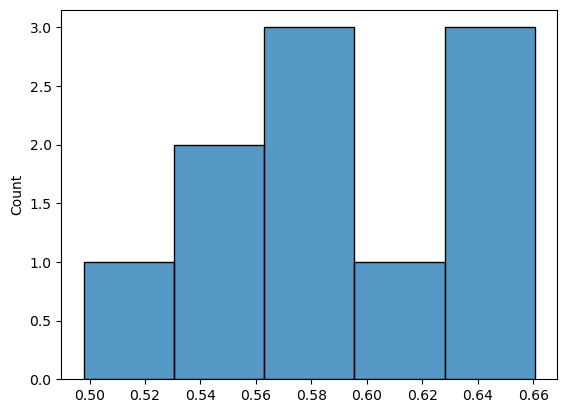

In [137]:
sns.histplot([get_f1_tree_bigrams_20() for i in range(10)])